This document was used to generate chebyshev polynomial fits to any specified function (for QET error analysis)

Use qsp_main6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import chebyshev

def plot_P_of_g(n, g, P):
    """
    Generates x_vals of 2**n points between (-1,1) and plots P(g(x_vals)).

    Parameters:
    n (int): The power for the number of points (N = 2**n).
    g (function): The function g(x).
    P (function): The function P(x).
    """
    N = 2**n
    x_vals = np.linspace(-1, 1, N)
    y_vals = P(g(x_vals))

    plt.plot(x_vals, y_vals)
    plt.xlabel('x')
    plt.ylabel('P(g(x))')
    plt.title('Plot of P(g(x))')
    plt.grid(True)
    plt.show()

def compute_chebyshev_P(f, g, threshold, n, max_degree=50):
    """
    Computes a Chebyshev polynomial P such that f(x_vals) ≈ P(g(x_vals))
    up to a specified threshold error.

    Parameters:
    f (function): The target function f(x).
    g (function): The function g(x) inside the Chebyshev polynomial.
    threshold (float): The maximum allowable error.
    n (int): The power for the number of points (N = 2**n).
    max_degree (int): The maximum degree of the Chebyshev polynomial.

    Returns:
    P (function): The Chebyshev polynomial function approximating f(x).
    deg (int): The degree of the Chebyshev polynomial used.
    error (float): The maximum error achieved.
    """
    N = 2**n
    x_vals = np.linspace(-1, 1, N)
    z_vals = g(x_vals)
    f_vals = f(x_vals)

    z_min = np.min(z_vals)
    z_max = np.max(z_vals)

    # Handle case where g(x) is a constant function
    if z_max == z_min:
        raise ValueError("Error: g(x) is a constant function.")

    # Map z_vals to t_vals in [-1, 1]
    t_vals = 2 * (z_vals - z_min) / (z_max - z_min) - 1

    deg = 1
    error = np.inf

    while error > threshold and deg <= max_degree:
        c_k = chebyshev.chebfit(t_vals, f_vals, deg)
        P_vals = chebyshev.chebval(t_vals, c_k)
        error = np.max(np.abs(P_vals - f_vals))
        if error > threshold:
            deg += 1
        else:
            break

    if deg > max_degree:
        print("Warning: Maximum degree reached without achieving desired threshold error.")

    # Define the Chebyshev polynomial P(z)
    def P(z):
        t = 2 * (z - z_min) / (z_max - z_min) - 1
        return chebyshev.chebval(t, c_k)

    return P, deg, error


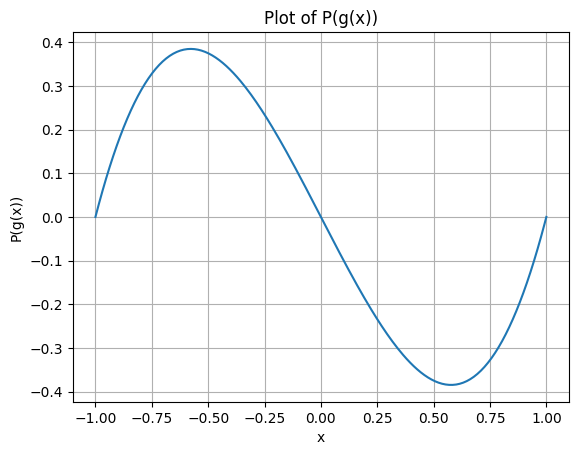

Degree of Chebyshev polynomial used: 7
Maximum error achieved: 2.4504627549326585e-08


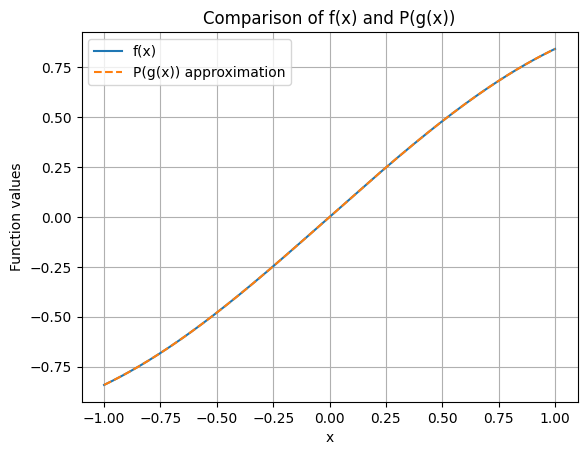

In [3]:
# Example usage:

# Define functions g(x), P(x), and f(x)
def g(x):
    return x  # Example g(x)

def P(x):
    return x**3 - x  # Example P(x)

def f(x):
    return np.sin(x)  # Example f(x)

# Plot P(g(x))
n = 8
plot_P_of_g(n, g, P)

# Compute Chebyshev polynomial P such that f(x) ≈ P(g(x))
threshold = 1e-6
P_cheb, degree_used, max_error = compute_chebyshev_P(f, g, threshold, n)

# Print degree and error
print(f"Degree of Chebyshev polynomial used: {degree_used}")
print(f"Maximum error achieved: {max_error}")

# Plot the approximation vs. the actual function
x_vals = np.linspace(-1, 1, 2**n)
plt.plot(x_vals, f(x_vals), label='f(x)')
plt.plot(x_vals, P_cheb(g(x_vals)), label='P(g(x)) approximation', linestyle='--')
plt.xlabel('x')
plt.ylabel('Function values')
plt.title('Comparison of f(x) and P(g(x))')
plt.legend()
plt.grid(True)
plt.show()

Degree of Chebyshev polynomial used: 12
Error (1 - fidelity): 1.559519180460711e-11


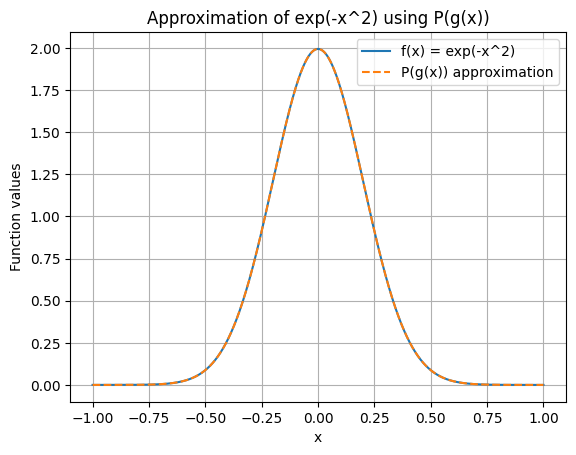

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import chebyshev

def g(x):
    return x**2

std = 0.2
f = lambda x: (1/(std * np.sqrt(2 * np.pi))) * np.exp(-(x**2) / (2 * std**2))


def compute_chebyshev_P(f, g, threshold, n, max_degree=50):
    N = 2**n
    x_vals = np.linspace(-1, 1, N)
    z_vals = g(x_vals)
    f_vals = f(x_vals)

    z_min = np.min(z_vals)
    z_max = np.max(z_vals)

    # Map z_vals to t_vals in [-1, 1]
    t_vals = 2 * (z_vals - z_min) / (z_max - z_min) - 1

    deg = 1
    error = np.inf

    while error > threshold and deg <= max_degree:
        c_k = chebyshev.chebfit(t_vals, f_vals, deg)
        P_vals = chebyshev.chebval(t_vals, c_k)

        # Compute fidelity
        dot_product = np.dot(f_vals, P_vals)
        norm_f = np.linalg.norm(f_vals)
        norm_P = np.linalg.norm(P_vals)
        fidelity = dot_product / (norm_f * norm_P)
        error = 1 - fidelity

        if error > threshold:
            deg += 1
        else:
            break

    if deg > max_degree and error > threshold:
        print("Warning: Maximum degree reached without achieving desired threshold error.")

    def P(z):
        t = 2 * (z - z_min) / (z_max - z_min) - 1
        return chebyshev.chebval(t, c_k)

    return P, deg, error

# Example usage
n = 12
threshold = 1e-10
P_cheb, degree_used, error = compute_chebyshev_P(f, g, threshold, n)

print(f"Degree of Chebyshev polynomial used: {degree_used}")
print(f"Error (1 - fidelity): {error}")

# Plotting
x_vals = np.linspace(-1, 1, 2**n)
plt.plot(x_vals, f(x_vals), label='f(x) = exp(-x^2)')
plt.plot(x_vals, P_cheb(g(x_vals)), label='P(g(x)) approximation', linestyle='--')
plt.xlabel('x')
plt.ylabel('Function values')
plt.title('Approximation of exp(-x^2) using P(g(x))')
plt.legend()
plt.grid(True)
plt.show()


Degree of Chebyshev polynomial used: 24
Error (1 - fidelity): 1.559519180460711e-11


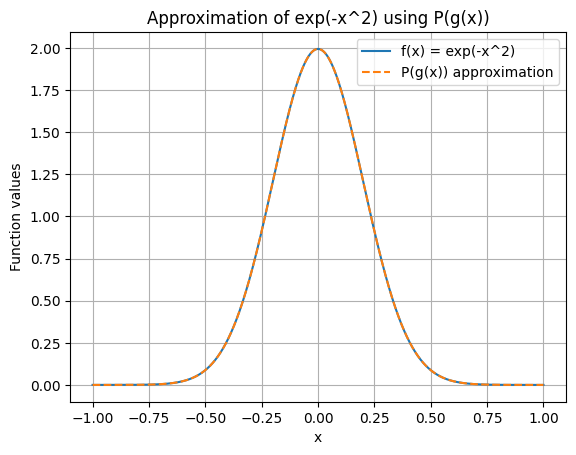

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import chebyshev

def g(x):
    return x

std = 0.2
f = lambda x: (1/(std * np.sqrt(2 * np.pi))) * np.exp(-(x**2) / (2 * std**2))


def compute_chebyshev_P(f, g, threshold, n, max_degree=50):
    N = 2**n
    x_vals = np.linspace(-1, 1, N)
    z_vals = g(x_vals)
    f_vals = f(x_vals)

    z_min = np.min(z_vals)
    z_max = np.max(z_vals)

    # Map z_vals to t_vals in [-1, 1]
    t_vals = 2 * (z_vals - z_min) / (z_max - z_min) - 1

    deg = 1
    error = np.inf

    while error > threshold and deg <= max_degree:
        c_k = chebyshev.chebfit(t_vals, f_vals, deg)
        P_vals = chebyshev.chebval(t_vals, c_k)

        # Compute fidelity
        dot_product = np.dot(f_vals, P_vals)
        norm_f = np.linalg.norm(f_vals)
        norm_P = np.linalg.norm(P_vals)
        fidelity = dot_product / (norm_f * norm_P)
        error = 1 - fidelity

        if error > threshold:
            deg += 1
        else:
            break

    if deg > max_degree and error > threshold:
        print("Warning: Maximum degree reached without achieving desired threshold error.")

    def P(z):
        t = 2 * (z - z_min) / (z_max - z_min) - 1
        return chebyshev.chebval(t, c_k)

    return P, deg, error

# Example usage
n = 12
threshold = 1e-10
P_cheb, degree_used, error = compute_chebyshev_P(f, g, threshold, n)

print(f"Degree of Chebyshev polynomial used: {degree_used}")
print(f"Error (1 - fidelity): {error}")

# Plotting
x_vals = np.linspace(-1, 1, 2**n)
plt.plot(x_vals, f(x_vals), label='f(x) = exp(-x^2)')
plt.plot(x_vals, P_cheb(g(x_vals)), label='P(g(x)) approximation', linestyle='--')
plt.xlabel('x')
plt.ylabel('Function values')
plt.title('Approximation of exp(-x^2) using P(g(x))')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
import numpy as np
from scipy.linalg import eigvalsh

# Define the Hamiltonian H (as a matrix for simulation purposes)
def H_matrix():
    # Example: A simple quantum harmonic oscillator discretized Hamiltonian
    N = 100  # Size of the Hilbert space
    x = np.linspace(-5, 5, N)
    dx = x[1] - x[0]
    V = 0.5 * x**2  # Potential energy

    # Kinetic energy operator (using finite differences)
    T = -0.5 * (np.diag(np.ones(N-1), -1) - 2 * np.diag(np.ones(N)) + np.diag(np.ones(N-1), 1)) / dx**2
    H = T + np.diag(V)
    return H

# Estimate E_min and E_max
H = H_matrix()
E_vals = eigvalsh(H)
E_min = E_vals[0]
E_max = E_vals[-1]

# Scale and shift H
def scale_H(H, E_min, E_max):
    return (2 * H - (E_max + E_min) * np.eye(H.shape[0])) / (E_max - E_min)

# Compute Chebyshev coefficients c_k for the filter function f(E)
def compute_chebyshev_coefficients(filter_function, degree):
    c_k = np.zeros(degree + 1)
    for k in range(degree + 1):
        # Integrate over E in [-1, 1]
        c_k[k] = (2 - (k == 0)) * np.trapz(
            filter_function(np.cos(np.arange(0, np.pi, 0.01))) * np.cos(k * np.arange(0, np.pi, 0.01)),
            dx=0.01
        ) / np.pi
    return c_k

# Define the filter function f(E)
def filter_function(E):
    # Example: Gaussian filter centered at E=E_min
    sigma = 0.1  # Adjust as needed
    return np.exp(-((E - E_min_scaled) / sigma)**2)

# Scale H and E_min
H_scaled = scale_H(H, E_min, E_max)
E_min_scaled = -1  # After scaling, E_min maps to -1

# Compute coefficients
degree = 50  # High-degree polynomial
c_k = compute_chebyshev_coefficients(filter_function, degree)

# Prepare initial state
psi_init = np.random.rand(H.shape[0])
psi_init /= np.linalg.norm(psi_init)

# Apply polynomial P(H) to psi_init
def apply_polynomial(H_scaled, c_k, psi_init):
    psi = c_k[0] * psi_init
    psi_prev = np.zeros_like(psi_init)
    psi_curr = psi_init
    for k in range(1, len(c_k)):
        psi_new = 2 * H_scaled @ psi_curr - psi_prev
        psi += c_k[k] * psi_new
        psi_prev = psi_curr
        psi_curr = psi_new
    return psi

psi_filtered = apply_polynomial(H_scaled, c_k, psi_init)
psi_filtered /= np.linalg.norm(psi_filtered)

# Compute fidelity with the true ground state
eigvals, eigvecs = np.linalg.eigh(H)
psi_ground = eigvecs[:, 0]
fidelity = np.abs(np.vdot(psi_ground, psi_filtered))**2
error = 1 - fidelity

print(f"Fidelity with ground state: {fidelity}")
print(f"Error (1 - fidelity): {error}")


Fidelity with ground state: 0.0860565371883315
Error (1 - fidelity): 0.9139434628116685


In [81]:
a = 0.5  # 'a' must be in (0, 1)
b = 5    # 'b' is typically a large odd integer
n_terms = 100  # Number of terms to approximate the infinite series

# Define the Weierstrass function
def weierstrass(x, a=0.5, b=5, n_terms=100):
    n = np.arange(n_terms)[:, np.newaxis]  # Shape (n_terms, 1)
    x = x[np.newaxis, :]                   # Shape (1, len(x))
    terms = a**n * np.cos(b**n * np.pi * x)
    return np.sum(terms, axis=0)

# Generate x values
x_values = np.linspace(-1, 1, 2**4)

# Compute the Weierstrass function values
f_values = weierstrass(x_values)

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import chebyshev

def g(x):
    return x


f = weierstrass

def compute_chebyshev_P(f, g, threshold, n, max_degree=50):
    N = 2**n
    x_vals = np.linspace(-0.1, 0,1, N)
    z_vals = g(x_vals)
    f_vals = f(x_vals)

    z_min = np.min(z_vals)
    z_max = np.max(z_vals)

    # Map z_vals to t_vals in [-1, 1]
    t_vals = 2 * (z_vals - z_min) / (z_max - z_min) - 1

    deg = 1
    error = np.inf

    while error > threshold and deg <= max_degree:
        c_k = chebyshev.chebfit(t_vals, f_vals, deg)
        P_vals = chebyshev.chebval(t_vals, c_k)

        # Compute fidelity
        dot_product = np.dot(f_vals, P_vals)
        norm_f = np.linalg.norm(f_vals)
        norm_P = np.linalg.norm(P_vals)
        fidelity = dot_product / (norm_f * norm_P)
        error = 1 - fidelity

        if error > threshold:
            deg += 1
        else:
            break

    if deg > max_degree and error > threshold:
        print("Warning: Maximum degree reached without achieving desired threshold error.")

    def P(z):
        t = 2 * (z - z_min) / (z_max - z_min) - 1
        return chebyshev.chebval(t, c_k)

    return P, deg, error

# Example usage
n = 12
threshold = 1e-10
P_cheb, degree_used, error = compute_chebyshev_P(f, g, threshold, n)

print(f"Degree of Chebyshev polynomial used: {degree_used}")
print(f"Error (1 - fidelity): {error}")

# Plotting
x_vals = np.linspace(-1, 1, 2**n)
plt.plot(x_vals, f(x_vals), label='f(x) = exp(-x^2)')
plt.plot(x_vals, P_cheb(g(x_vals)), label='P(g(x)) approximation', linestyle='--')
plt.xlabel('x')
plt.ylabel('Function values')
plt.title('Approximation of exp(-x^2) using P(g(x))')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\0josh\AppData\Local\Temp\ipykernel_11020\2236418184.py:21: RuntimeWarning: invalid value encountered in divide
  t_vals = 2 * (z_vals - z_min) / (z_max - z_min) - 1


LinAlgError: SVD did not converge in Linear Least Squares

In [23]:
from numpy.polynomial.chebyshev import chebval


In [24]:
def generate_piecewise_chebyshev(domain, num_subintervals, degree, seed=None):
    """
    Generates a piecewise Chebyshev polynomial function ensuring continuity at knots.

    Parameters:
    - domain: tuple, the interval (a, b)
    - num_subintervals: int, number of subintervals
    - degree: int, degree of Chebyshev polynomials on each subinterval
    - seed: int or None, random seed for reproducibility

    Returns:
    - func: callable, the piecewise Chebyshev polynomial function
    - knots: numpy array, the partition points
    """
    if seed is not None:
        np.random.seed(seed)
    
    a, b = domain
    knots = np.linspace(a, b, num_subintervals + 1)
    polynomials = []
    
    # Initialize previous value for continuity
    prev_val = 0
    
    for i in range(num_subintervals):
        # Generate random coefficients for Chebyshev polynomial of given degree
        # Coefficients are in the Chebyshev basis
        coeffs = np.random.randn(degree + 1)
        
        # Create Chebyshev polynomial over [-1, 1]
        # To map to [knots[i], knots[i+1]], use linear transformation
        # x_mapped = (2x - (b + a)) / (b - a)
        # Here, a = knots[i], b = knots[i+1]
        def chebyshev_poly(x, coeffs=coeffs, a=knots[i], b=knots[i+1]):
            # Map x from [a, b] to [-1, 1]
            x_mapped = (2 * x - (b + a)) / (b - a)
            y = chebval(x_mapped, coeffs)
            return y
        
        # To ensure continuity, adjust the constant term so that P(a) = prev_val
        # P(a) = chebval(-1, coeffs) = sum_{k=0}^degree c_k T_k(-1)
        # Compute sum_{k=0}^degree c_k T_k(-1)
        T = np.cos(np.pi * np.arange(degree +1))  # T_k(-1) = (-1)^k
        poly_at_a = np.dot(coeffs, T)
        coeffs_adjusted = coeffs.copy()
        coeffs_adjusted[0] += prev_val - poly_at_a  # Adjust c0
        
        polynomials.append((coeffs_adjusted, knots[i], knots[i+1]))
        
        # Update prev_val to P(b)
        # P(b) = chebval(1, coeffs) = sum_{k=0}^degree c_k T_k(1) = c0 + c1 + ... + c_degree
        poly_at_b = np.dot(coeffs_adjusted, np.ones(degree +1))  # T_k(1) = 1
        prev_val = poly_at_b
    
    def func(x):
        """
        Evaluates the piecewise Chebyshev polynomial at x.

        Parameters:
        - x: float or numpy array

        Returns:
        - y: float or numpy array
        """
        x = np.array(x)
        y = np.zeros_like(x, dtype=np.float64)
        
        for coeffs, a, b in polynomials:
            mask = (x >= a) & (x <= b) if a != knots[-1] else (x >= a) & (x <= b + 1e-12)
            x_mapped = (2 * x[mask] - (b + a)) / (b - a)
            y[mask] = chebval(x_mapped, coeffs)
        
        return y
    
    return func

In [32]:
f = generate_piecewise_chebyshev((-1,1),10,10)

In [35]:
from scipy import signal


In [42]:
def f(t, frequency=5, duty_cycle=0.5):
    return signal.square(2 * np.pi * frequency * t, duty=duty_cycle)

In [51]:
f = lambda x:  np.cos(x**3)

Degree of Chebyshev polynomial used: 5
Error (1 - fidelity): 3.690991956517564e-11


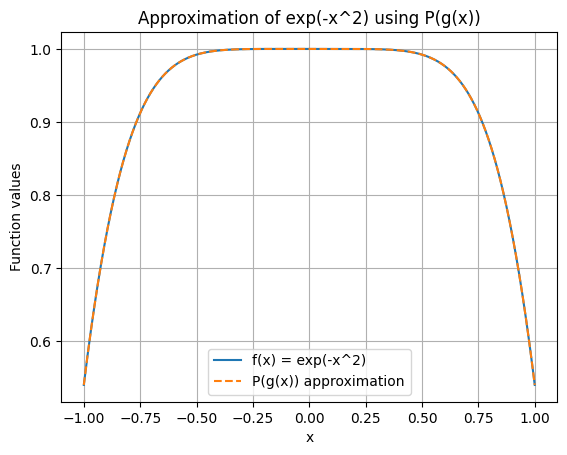

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import chebyshev

def g(x):
    return x**2



def compute_chebyshev_P(f, g, threshold, n, max_degree=50):
    N = 2**n
    x_vals = np.linspace(-1, 1, N)
    z_vals = g(x_vals)
    f_vals = f(x_vals)

    z_min = np.min(z_vals)
    z_max = np.max(z_vals)

    # Map z_vals to t_vals in [-1, 1]
    t_vals = 2 * (z_vals - z_min) / (z_max - z_min) - 1

    deg = 1
    error = np.inf

    while error > threshold and deg <= max_degree:
        c_k = chebyshev.chebfit(t_vals, f_vals, deg)
        P_vals = chebyshev.chebval(t_vals, c_k)

        # Compute fidelity
        dot_product = np.dot(f_vals, P_vals)
        norm_f = np.linalg.norm(f_vals)
        norm_P = np.linalg.norm(P_vals)
        fidelity = dot_product / (norm_f * norm_P)
        error = 1 - fidelity

        if error > threshold:
            deg += 1
        else:
            break

    if deg > max_degree and error > threshold:
        print("Warning: Maximum degree reached without achieving desired threshold error.")

    def P(z):
        t = 2 * (z - z_min) / (z_max - z_min) - 1
        return chebyshev.chebval(t, c_k)

    return P, deg, error

# Example usage
n = 12
threshold = 1e-10
P_cheb, degree_used, error = compute_chebyshev_P(f, g, threshold, n)

print(f"Degree of Chebyshev polynomial used: {degree_used}")
print(f"Error (1 - fidelity): {error}")

# Plotting
x_vals = np.linspace(-1, 1, 2**n)
plt.plot(x_vals, f(x_vals), label='f(x) = exp(-x^2)')
plt.plot(x_vals, P_cheb(g(x_vals)), label='P(g(x)) approximation', linestyle='--')
plt.xlabel('x')
plt.ylabel('Function values')
plt.title('Approximation of exp(-x^2) using P(g(x))')
plt.legend()
plt.grid(True)
plt.show()


Degree of Chebyshev polynomial used: 10
Error (1 - fidelity): 3.6910030587478104e-11


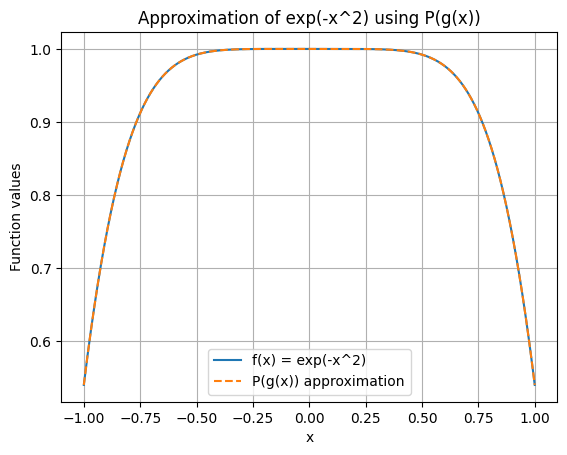

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import chebyshev

def g(x):
    return x

def compute_chebyshev_P(f, g, threshold, n, max_degree=50):
    N = 2**n
    x_vals = np.linspace(-1, 1, N)
    z_vals = g(x_vals)
    f_vals = f(x_vals)

    z_min = np.min(z_vals)
    z_max = np.max(z_vals)

    # Map z_vals to t_vals in [-1, 1]
    t_vals = 2 * (z_vals - z_min) / (z_max - z_min) - 1

    deg = 1
    error = np.inf

    while error > threshold and deg <= max_degree:
        c_k = chebyshev.chebfit(t_vals, f_vals, deg)
        P_vals = chebyshev.chebval(t_vals, c_k)

        # Compute fidelity
        dot_product = np.dot(f_vals, P_vals)
        norm_f = np.linalg.norm(f_vals)
        norm_P = np.linalg.norm(P_vals)
        fidelity = dot_product / (norm_f * norm_P)
        error = 1 - fidelity

        if error > threshold:
            deg += 1
        else:
            break

    if deg > max_degree and error > threshold:
        print("Warning: Maximum degree reached without achieving desired threshold error.")

    def P(z):
        t = 2 * (z - z_min) / (z_max - z_min) - 1
        return chebyshev.chebval(t, c_k)

    return P, deg, error

# Example usage
n = 12
threshold = 1e-10
P_cheb, degree_used, error = compute_chebyshev_P(f, g, threshold, n)

print(f"Degree of Chebyshev polynomial used: {degree_used}")
print(f"Error (1 - fidelity): {error}")

# Plotting
x_vals = np.linspace(-1, 1, 2**n)
plt.plot(x_vals, f(x_vals), label='f(x) = exp(-x^2)')
plt.plot(x_vals, P_cheb(g(x_vals)), label='P(g(x)) approximation', linestyle='--')
plt.xlabel('x')
plt.ylabel('Function values')
plt.title('Approximation of exp(-x^2) using P(g(x))')
plt.legend()
plt.grid(True)
plt.show()


Degree of Chebyshev polynomial used: 51
Error (1 - fidelity): 1.876419897239856e-08


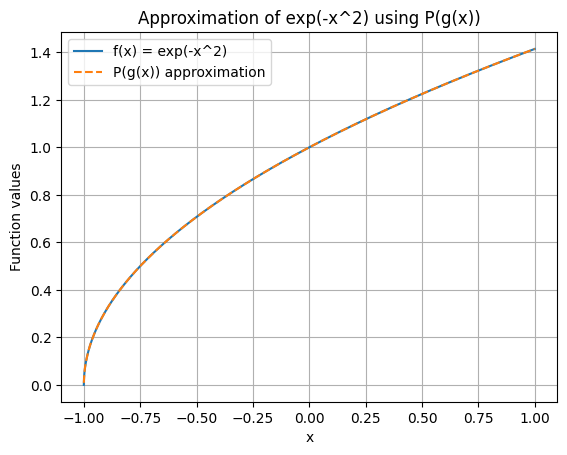

In [67]:
n=20

f = lambda x: np.sqrt(x+1)

import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import chebyshev

def g(x):
    return x

def compute_chebyshev_P(f, g, threshold, n, max_degree=50):
    N = 2**n
    x_vals = np.linspace(-1, 1, N)
    z_vals = g(x_vals)
    f_vals = f(x_vals)

    z_min = np.min(z_vals)
    z_max = np.max(z_vals)

    # Map z_vals to t_vals in [-1, 1]
    t_vals = 2 * (z_vals - z_min) / (z_max - z_min) - 1

    deg = 1
    error = np.inf

    while error > threshold and deg <= max_degree:
        c_k = chebyshev.chebfit(t_vals, f_vals, deg)
        P_vals = chebyshev.chebval(t_vals, c_k)

        # Compute fidelity
        dot_product = np.dot(f_vals, P_vals)
        norm_f = np.linalg.norm(f_vals)
        norm_P = np.linalg.norm(P_vals)
        fidelity = dot_product / (norm_f * norm_P)
        error = 1 - fidelity

        if error > threshold:
            deg += 1
        else:
            break

    if deg > max_degree and error > threshold:
        print("Warning: Maximum degree reached without achieving desired threshold error.")

    def P(z):
        t = 2 * (z - z_min) / (z_max - z_min) - 1
        return chebyshev.chebval(t, c_k)

    return P, deg, error

# Example usage
n = 12
threshold = 1e-10
P_cheb, degree_used, error = compute_chebyshev_P(f, g, threshold, n)

print(f"Degree of Chebyshev polynomial used: {degree_used}")
print(f"Error (1 - fidelity): {error}")

# Plotting
x_vals = np.linspace(-1, 1, 2**n)
plt.plot(x_vals, f(x_vals), label='f(x) = exp(-x^2)')
plt.plot(x_vals, P_cheb(g(x_vals)), label='P(g(x)) approximation', linestyle='--')
plt.xlabel('x')
plt.ylabel('Function values')
plt.title('Approximation of exp(-x^2) using P(g(x))')
plt.legend()
plt.grid(True)
plt.show()


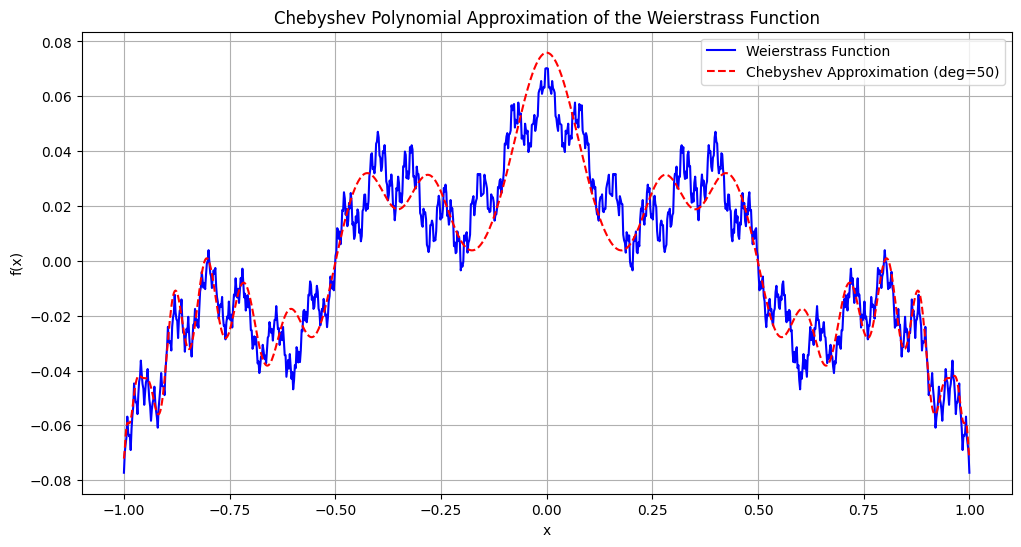

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import chebyshev

# 1. Define the Weierstrass Function
def weierstrass(x, a=0.5, b=5, n_terms=100):
    n = np.arange(n_terms)[:, np.newaxis]  # Shape (n_terms, 1)
    x = x[np.newaxis, :]                   # Shape (1, len(x))
    terms = a**n * np.cos(b**n * np.pi * x)
    return np.sum(terms, axis=0)

# Parameters
a = 0.5
b = 5
n_terms = 100
deg = 50  # Degree of the Chebyshev polynomial
x_min, x_max = -1, 1

# 2. Generate Chebyshev Nodes
from numpy.polynomial.chebyshev import chebpts1

cheb_nodes = chebpts1(deg + 1)
# Scale nodes to [x_min, x_max]
cheb_nodes = 0.5 * (x_max - x_min) * cheb_nodes + 0.5 * (x_max + x_min)

# 3. Evaluate the Weierstrass Function at Chebyshev Nodes
f_nodes = weierstrass(cheb_nodes, a, b, n_terms)

# 4. Compute Chebyshev Coefficients
coeffs = chebyshev.chebfit(cheb_nodes, f_nodes, deg)

# 5. Evaluate the Chebyshev Polynomial Approximation
x_values = np.linspace(x_min, x_max, 1000)
f_approx = chebyshev.chebval(x_values, coeffs)

# 6. Evaluate the Original Function for Comparison
f_original = weierstrass(x_values, a, b, n_terms)

f_original = f_original / np.linalg.norm(f_original)
f_approx = f_approx/np.linalg.norm(f_approx)

#f_nodes = cheb_nodes / np.linalg.norm(f_original)
# 7. Plotting
plt.figure(figsize=(12, 6))
plt.plot(x_values, f_original, label='Weierstrass Function', color='blue')
plt.plot(x_values, f_approx, label=f'Chebyshev Approximation (deg={deg})', color='red', linestyle='--')
#plt.scatter(cheb_nodes, f_nodes, color='green', label='Chebyshev Nodes')
plt.title('Chebyshev Polynomial Approximation of the Weierstrass Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


In [96]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import chebyshev

# 1. Define the Weierstrass Function
def weierstrass(x, a=0.5, b=5, n_terms=100):
    n = np.arange(n_terms)[:, np.newaxis]  # Shape (n_terms, 1)
    x = x[np.newaxis, :]                   # Shape (1, len(x))
    terms = a**n * np.cos(b**n * np.pi * x)
    return np.sum(terms, axis=0)

# Parameters
a = 0.5
b = 5
n_terms = 100
degrees = [10, 50, 100]  # Degrees of the Chebyshev polynomials
x_min, x_max = -1, 1

# 2. Evaluate the Original Function for Comparison
x_values = np.linspace(x_min, x_max, 1000)
f_original = weierstrass(x_values, a, b, n_terms)
f_original_norm = f_original / np.linalg.norm(f_original)

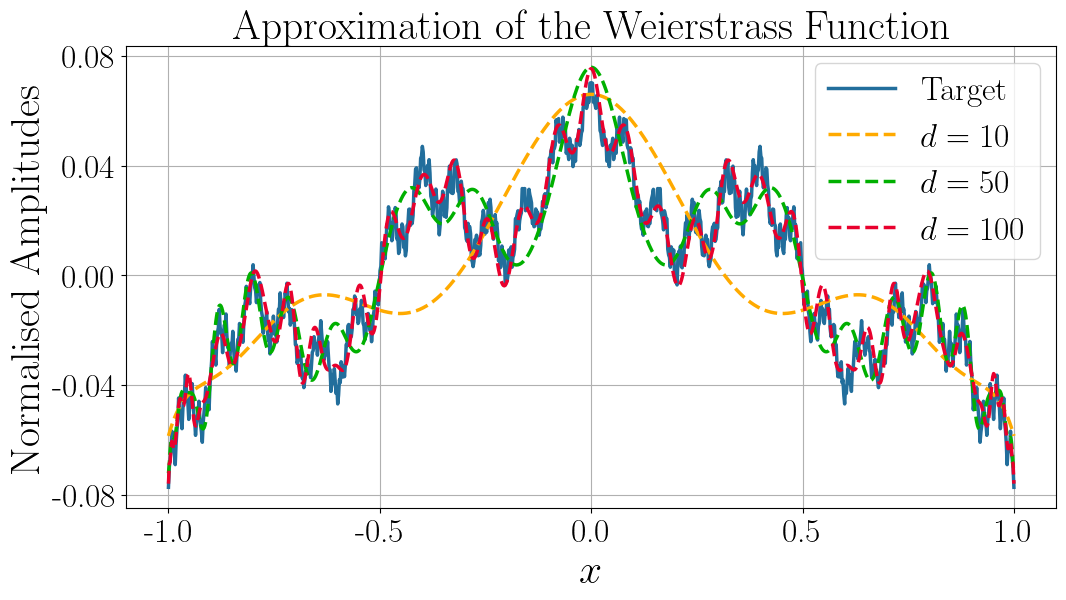

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import chebyshev

# 1. Define the Weierstrass Function
def weierstrass(x, a=0.5, b=5, n_terms=100):
    n = np.arange(n_terms)[:, np.newaxis]  # Shape (n_terms, 1)
    x = x[np.newaxis, :]                   # Shape (1, len(x))
    terms = a**n * np.cos(b**n * np.pi * x)
    return np.sum(terms, axis=0)

# Parameters
a = 0.5
b = 5
n_terms = 100
degrees = [10, 50, 100]  # Degrees of the Chebyshev polynomials
x_min, x_max = -1, 1

# 2. Evaluate the Original Function for Comparison
x_values = np.linspace(x_min, x_max, 1000)
f_original = weierstrass(x_values, a, b, n_terms)
f_original_norm = f_original / np.linalg.norm(f_original)

# Prepare the plot with LaTeX fonts and adjusted sizes
from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif')

plt.figure(figsize=(12, 6))

# Plot the original function
plt.plot(
    x_values,
    f_original_norm,
    label='Target',
    color='#226E9C',
    linewidth=2.5,
    alpha=1
)

# For each degree, compute the Chebyshev approximation and plot it
colors = ['#FFAA00', '#00B000', '#E9002D']  # Different colors for different degrees
linestyles = ['--', '--', '--']

for deg, color, ls in zip(degrees, colors, linestyles):
    # Generate Chebyshev Nodes
    cheb_nodes = chebyshev.chebpts1(deg + 1)
    # Scale nodes to [x_min, x_max]
    cheb_nodes = 0.5 * (x_max - x_min) * cheb_nodes + 0.5 * (x_max + x_min)
    # Evaluate the Weierstrass Function at Chebyshev Nodes
    f_nodes = weierstrass(cheb_nodes, a, b, n_terms)
    # Compute Chebyshev Coefficients
    coeffs = chebyshev.chebfit(cheb_nodes, f_nodes, deg)
    # Evaluate the Chebyshev Polynomial Approximation
    f_approx = chebyshev.chebval(x_values, coeffs)
    # Normalize the approximation
    f_approx_norm = f_approx / np.linalg.norm(f_approx)
    # Plot the approximation
    plt.plot(
        x_values,
        f_approx_norm,
        label=rf'$d = {deg}$',
        color=color,
        linestyle=ls,
        linewidth=2.5
    )

# Adjust font sizes
plt.title('Approximation of the Weierstrass Function', fontsize=30)
plt.xlabel('$x$', fontsize=30)
plt.ylabel('Normalised Amplitudes', fontsize=30)

# Adjust x-ticks
x_ticks = [-1, -0.5, 0, 0.5, 1]
x_labels = [f'{x:.1f}' for x in x_ticks]
plt.xticks(x_ticks, x_labels, fontsize=24)

# Adjust y-ticks
y_ticks = [-0.08, -0.04, 0, 0.04, 0.08]
y_labels = [f'{y:.2f}' for y in y_ticks]
plt.yticks(y_ticks, y_labels, fontsize=24)

plt.legend(fontsize=24, loc='upper right')
plt.grid(True)

plt.savefig(r'C:\Users\0josh\OneDrive\Desktop\Re-organised Honours Year\Thesis Documents\QET Plots\weier.pdf', dpi=600, bbox_inches='tight', transparent=False)

plt.show()


In [117]:
def g(x):
    return x**2

std = 0.2
f = lambda x: (1/(std * np.sqrt(2 * np.pi))) * np.exp(-(x**2) / (2 * std**2))


def compute_chebyshev_P(f, g, threshold, n, max_degree=50):
    N = 2**n
    x_vals = np.linspace(-1, 1, N)
    z_vals = g(x_vals)
    f_vals = f(x_vals)

    z_min = np.min(z_vals)
    z_max = np.max(z_vals)

    # Map z_vals to t_vals in [-1, 1]
    t_vals = 2 * (z_vals - z_min) / (z_max - z_min) - 1

    deg = 1
    error = np.inf

    while error > threshold and deg <= max_degree:
        c_k = chebyshev.chebfit(t_vals, f_vals, deg)
        P_vals = chebyshev.chebval(t_vals, c_k)

        # Compute fidelity
        dot_product = np.dot(f_vals, P_vals)
        norm_f = np.linalg.norm(f_vals)
        norm_P = np.linalg.norm(P_vals)
        fidelity = dot_product / (norm_f * norm_P)
        error = 1 - fidelity

        if error > threshold:
            deg += 1
        else:
            break

    if deg > max_degree and error > threshold:
        print("Warning: Maximum degree reached without achieving desired threshold error.")

    def P(z):
        t = 2 * (z - z_min) / (z_max - z_min) - 1
        return chebyshev.chebval(t, c_k)

    return P, deg, error


In [159]:
# Example usage
n = 12
threshold = 1e-10

g = lambda x: x**2
g2 = lambda x: x

P1, degree_used, error = compute_chebyshev_P(f, g, threshold=1e-15,max_degree=9, n=n)

P2,d2,e2 = compute_chebyshev_P(f, g2, threshold=1e-15,max_degree=9, n=n)

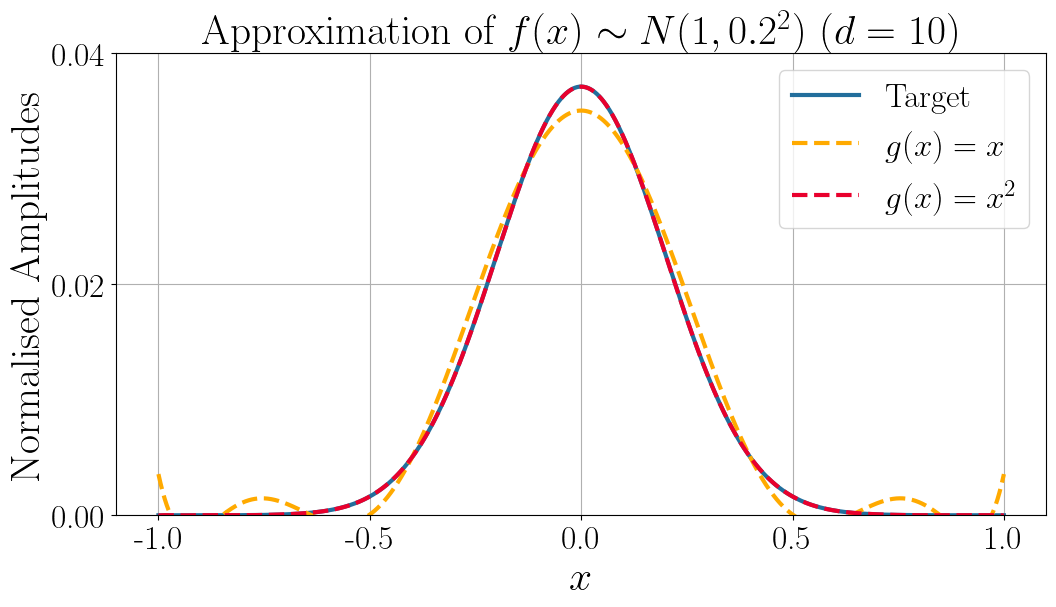

In [164]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
std = 0.2  # Standard deviation of the Gaussian
x_min, x_max = -1, 1  # Range for x values

# Generate x values for plotting
x_values = np.linspace(x_min, x_max, 2**n)

# Define the target function (Gaussian function)
f = lambda x: (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x**2) / (2 * std**2))
f_values = f(x_values)

# Normalize the target function values
f_values_norm = f_values / np.linalg.norm(f_values)

P_cheb2 = P1(g(x_vals))
P_cheb = P2(x_values)

# Load or define your precomputed approximations P_cheb and P_cheb2
# Ensure that they are arrays of the same length as x_values
# Replace the placeholder code below with your actual data

# Example placeholders (replace these with your actual data)
# P_cheb = np.load('P_cheb.npy')
# P_cheb2 = np.load('P_cheb2.npy')

# Normalize the approximations
P_cheb_norm = P_cheb / np.linalg.norm(P_cheb)
P_cheb2_norm = P_cheb2 / np.linalg.norm(P_cheb2)

# Prepare the plot with LaTeX fonts and adjusted sizes
from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif')

plt.figure(figsize=(12, 6))

# Plot the target function
plt.plot(
    x_values,
    f_values_norm,
    label='Target',
    color='#226E9C',
    linewidth=3,
    alpha=1
)

# Plot the approximations
colors = ['#E9002D','#FFAA00']  # Colors for P_cheb and P_cheb2
colors = ['#FFAA00','#E9002D']  # Colors for P_cheb and P_cheb2

linestyles = ['--', '--']
labels = [r'$g(x)=x$', r'$g(x)=x^2$']  # Labels for the approximations

for P_norm, color, ls, label in zip([P_cheb_norm, P_cheb2_norm], colors, linestyles, labels):
    plt.plot(
        x_values,
        P_norm,
        label=label,
        color=color,
        linestyle=ls,
        linewidth=3
    )

# Adjust font sizes and labels
plt.title(r'Approximation of $f(x)\sim N(1,0.2^2)$ ($d=10$)', fontsize=30)
plt.xlabel(r'$x$', fontsize=30)
plt.ylabel(r'Normalised Amplitudes', fontsize=30)

# Adjust x-ticks
x_ticks = [-1, -0.5, 0, 0.5, 1]
x_labels = [f'{x:.1f}' for x in x_ticks]
plt.xticks(x_ticks, x_labels, fontsize=24)

# Adjust y-ticks
y_ticks = [0, 0.02,0.04]
y_labels = [f'{y:.2f}' for y in y_ticks]

plt.yticks(y_ticks, y_labels, fontsize=24)
plt.ylim(0, 0.04)

# Legend and grid
plt.legend(fontsize=24, loc='upper right')
plt.grid(True)

plt.savefig(r'C:\Users\0josh\OneDrive\Desktop\Re-organised Honours Year\Thesis Documents\QET Plots\gaus_fit.pdf', dpi=600, bbox_inches='tight', transparent=False)


plt.show()


In [126]:
print(error)
print(e2)

7.465732598799235e-08
0.003378863309490887


Degree of Chebyshev polynomial used: 10
Error (1 - fidelity): 7.465732598799235e-08


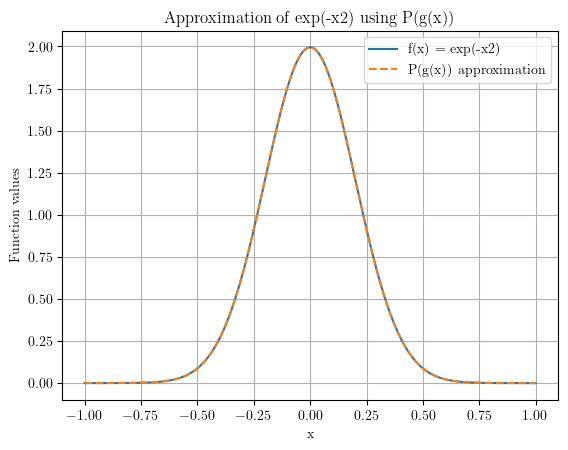

In [124]:

print(f"Degree of Chebyshev polynomial used: {degree_used}")
print(f"Error (1 - fidelity): {error}")

# Plotting
x_vals = np.linspace(-1, 1, 2**n)
plt.plot(x_vals, f(x_vals), label='f(x) = exp(-x2)')
plt.plot(x_vals, P_cheb(g(x_vals)), label='P(g(x)) approximation', linestyle='--')
plt.xlabel('x')
plt.ylabel('Function values')
plt.title('Approximation of exp(-x2) using P(g(x))')
plt.legend()
plt.grid(True)
plt.show()
